In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv(r"Studio_Ghibli CLEANED.csv")

In [14]:
# Displaying the first few rows of the dataset
print(data.head())

# Checking the data types of columns
print(data.dtypes)

                              Name  Year              Director  \
0            When Marnie Was There  2014  Hiromasa Yonebayashi   
1  The Tale of The Princess Kaguya  2013         Isao Takahata   
2                   The Wind Rises  2013        Hayao Miyazaki   
3            From Up on Poppy Hill  2011         Goro Miyazaki   
4     The Secret World of Arrietty  2010  Hiromasa Yonebayashi   

         Screenplay              Budget           Revenue    Genre 1  \
0  Joan G. Robinson  $1,150,000,000.00    $34,949,567.00   Animation   
1    Riko Sakaguchi     $49,300,000.00    $24,366,656.00   Animation   
2       Tatsuo Hori     $30,000,000.00   $117,932,401.00       Drama   
3    Hayao Miyazaki     $22,000,000.00    $61,037,844.00   Animation   
4       Mary Norton     $23,000,000.00   $149,480,483.00     Fantasy   

     Genre 2  Genre 3 Duration  Duration in Minutes  
0      Drama  unknown   1h 43m                  103  
1      Drama  Fantasy   2h 17m                  137  
2  Anima

In [17]:
data['Budget'] = data['Budget'].replace('[\$,]', '', regex=True).astype(float)
data['Revenue'] = data['Revenue'].replace('[\$,]', '', regex=True).astype(float)
print(data[['Budget', 'Revenue']].head())

         Budget      Revenue
0  1.150000e+09   34949567.0
1  4.930000e+07   24366656.0
2  3.000000e+07  117932401.0
3  2.200000e+07   61037844.0
4  2.300000e+07  149480483.0


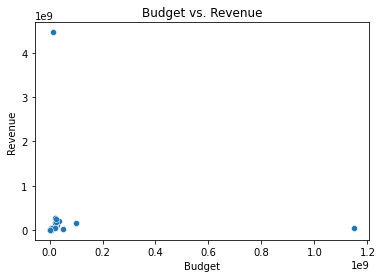

In [18]:
# Visualizing the relationship between Budget and Revenue
sns.scatterplot(x='Budget', y='Revenue', data=data)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [25]:
# Training a simple linear regression model to predict Revenue based on Budget
# Splitting the data into features (X) and target variable (y)
X = data[['Budget']]
y = data['Revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.393925470692569e+18


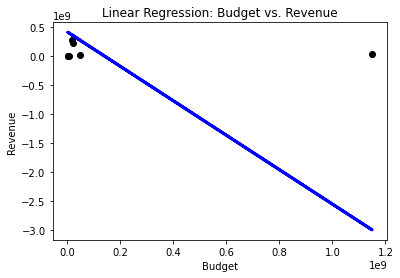

In [26]:
# Visualizing the model's predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression: Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [27]:
# Checking correlation between Budget and Revenue
correlation = data['Budget'].corr(data['Revenue'])
print("Correlation between Budget and Revenue:", correlation)

Correlation between Budget and Revenue: -0.06041760106896562
